In [225]:
#import nessesory libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#import sklearn libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# ignore harmless warnings
import warnings
warnings.filterwarnings('ignore')

In [226]:
pd.set_option('display.max_column',None)

In [227]:
# import data 
df = pd.read_csv('kidney_disease.csv')

#data dimensions
df.shape

(400, 26)

In [228]:
# data sample
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [229]:
# missing value check

df.isna().sum()/len(df)*100

id                 0.00
age                2.25
bp                 3.00
sg                11.75
al                11.50
su                12.25
rbc               38.00
pc                16.25
pcc                1.00
ba                 1.00
bgr               11.00
bu                 4.75
sc                 4.25
sod               21.75
pot               22.00
hemo              13.00
pcv               17.50
wc                26.25
rc                32.50
htn                0.50
dm                 0.50
cad                0.50
appet              0.25
pe                 0.25
ane                0.25
classification     0.00
dtype: float64

Normally if we have more than 25% of miising value we should remove it but here in health care sector every features are very important so we should not remove it.

In [231]:
# datatype check

pd.concat([df.dtypes,df.head().T], axis=1)


,0,0,1,2,3,4
id,int64,0,1,2,3,4
age,float64,48.0,7.0,62.0,48.0,51.0
bp,float64,80.0,50.0,80.0,70.0,80.0
sg,float64,1.02,1.02,1.01,1.005,1.01
al,float64,1.0,4.0,2.0,4.0,2.0
su,float64,0.0,0.0,3.0,0.0,0.0
rbc,object,NaN,NaN,normal,normal,normal
pc,object,normal,normal,normal,abnormal,normal
pcc,object,notpresent,notpresent,notpresent,present,notpresent
ba,object,notpresent,notpresent,notpresent,notpresent,notpresent


We can see there are some datatype assigned wrongly so we should change it to its perticular right datatype, but before that we need to see unique values contained by columns

In [233]:
# Check unique values

for col in df.columns:
    print(f'**********************************[ {col} ]*********************************')
    print(df[col].unique())
    print()

**********************************[ id ]*********************************
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 2

In [234]:
# treat falsely entred data
df['classification'] = df['classification'].apply(lambda x: 'ckd' if x=='ckd\t' else x)

df['cad'] = df['cad'].apply(lambda x: 'no' if x=='\tno' else x)

df['dm'] = df['dm'].apply(lambda x: 'yes' if x==' yes' else x)
df['dm'] = df['dm'].apply(lambda x: 'no' if x=='\tno' else x)
df['dm'] = df['dm'].apply(lambda x: 'yes' if x=='\tyes' else x)

df['rc'] = df['rc'].apply(lambda x: df['rc'].mode()[0] if x=='\t?' else x)

df['wc'] = df['wc'].apply(lambda x: '6200' if x=='\t6200' else x)
df['wc'] = df['wc'].apply(lambda x: '8400' if x=='\t8400' else x)
df['wc'] = df['wc'].apply(lambda x: df['wc'].mode()[0] if x=='\t?' else x)


df['pcv'] = df['pcv'].apply(lambda x: '43' if x=='\t43' else x)
df['pcv'] = df['pcv'].apply(lambda x: df['pcv'].mode()[0] if x=='\t?' else x)


In [235]:
# unique values after treating false data
for col in df.columns:
    print(f'**********************************[ {col} ]*********************************')
    print(df[col].unique())
    print()

**********************************[ id ]*********************************
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 2

In [236]:
# Change data type to its appropreate datatype
df['rc'] = pd.to_numeric(df['rc'])
df['wc'] = pd.to_numeric(df['wc'])
df['pcv'] = pd.to_numeric(df['pcv'])

In [237]:
# datatype check after processing

pd.concat([df.dtypes,df.head().T], axis=1)

,0,0,1,2,3,4
id,int64,0,1,2,3,4
age,float64,48.0,7.0,62.0,48.0,51.0
bp,float64,80.0,50.0,80.0,70.0,80.0
sg,float64,1.02,1.02,1.01,1.005,1.01
al,float64,1.0,4.0,2.0,4.0,2.0
su,float64,0.0,0.0,3.0,0.0,0.0
rbc,object,NaN,NaN,normal,normal,normal
pc,object,normal,normal,normal,abnormal,normal
pcc,object,notpresent,notpresent,notpresent,present,notpresent
ba,object,notpresent,notpresent,notpresent,notpresent,notpresent


In [238]:
# split featues into categorical and numerical 

cat_df = df.select_dtypes(include="O")
num_df = df.select_dtypes(exclude="O")

In [239]:
# handle missing values
from sklearn.impute import SimpleImputer

cat_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
num_imputer = SimpleImputer(missing_values=np.nan, strategy='median')

cat_df1 = pd.DataFrame(cat_imputer.fit_transform(df[cat_df.columns]))
num_df1 = pd.DataFrame(num_imputer.fit_transform(df[num_df.columns]))

cat_df1.columns = cat_df.columns
num_df1.columns = num_df.columns

cat_df1

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,classification
0,normal,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...
395,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
396,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
397,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
398,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd


In [240]:
#check null values after treatment
print(cat_df1.isna().sum())
print(num_df1.isna().sum())

rbc               0
pc                0
pcc               0
ba                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64
id      0
age     0
bp      0
sg      0
al      0
su      0
bgr     0
bu      0
sc      0
sod     0
pot     0
hemo    0
pcv     0
wc      0
rc      0
dtype: int64


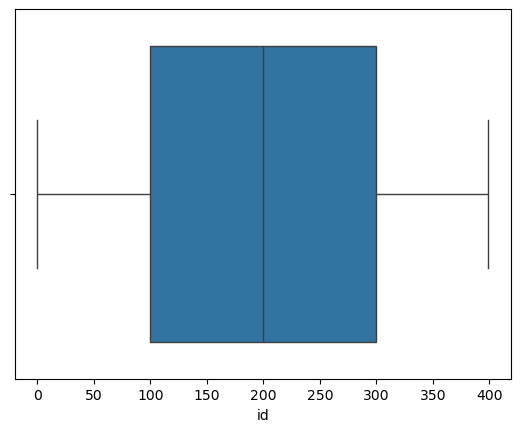

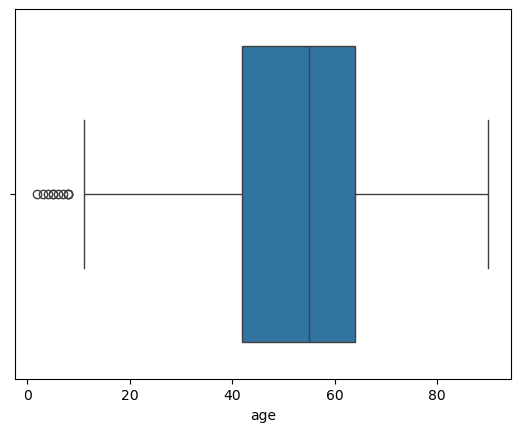

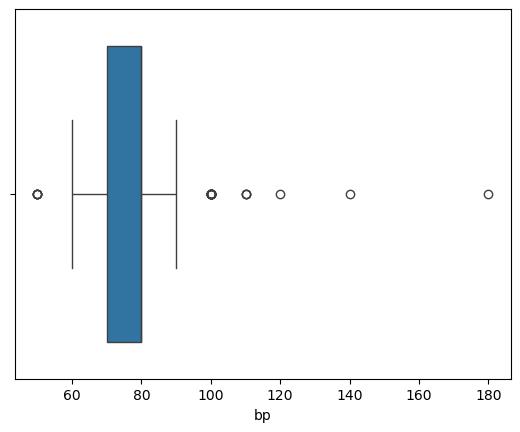

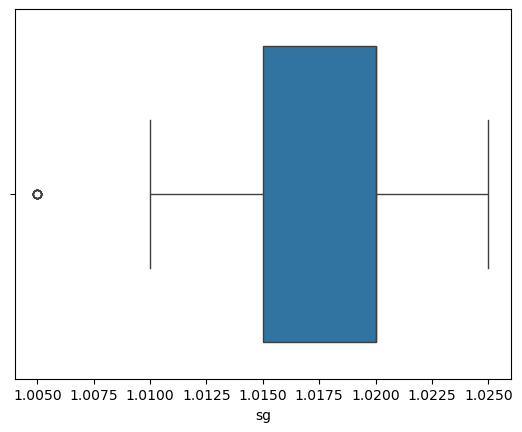

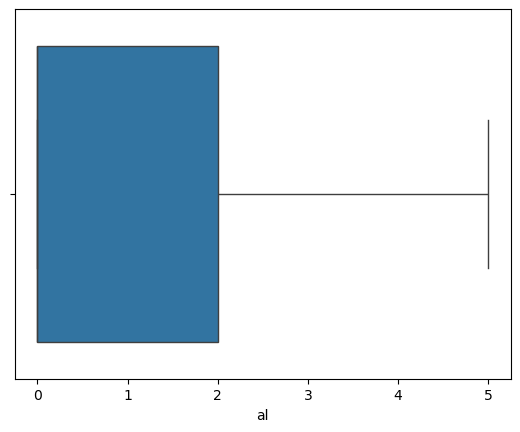

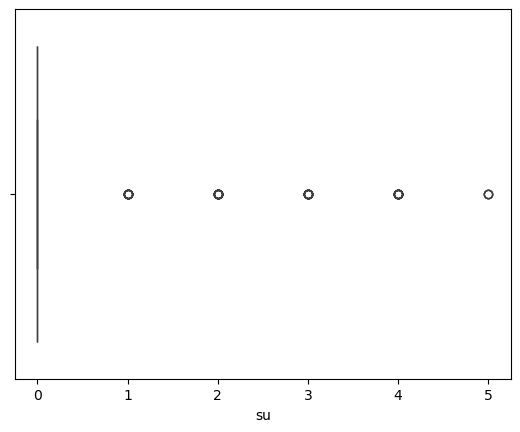

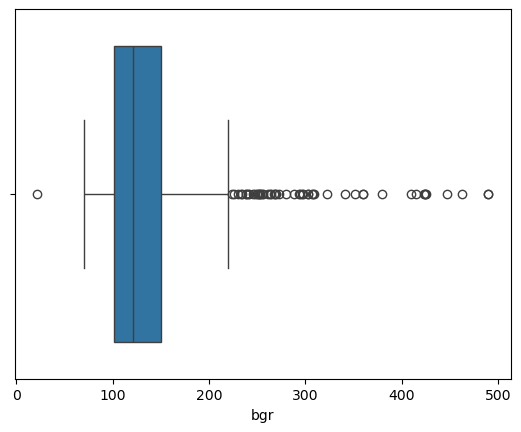

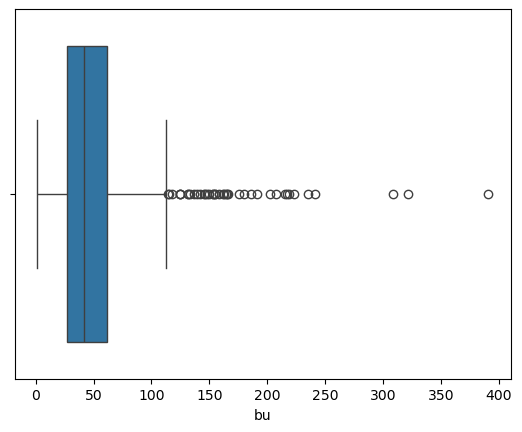

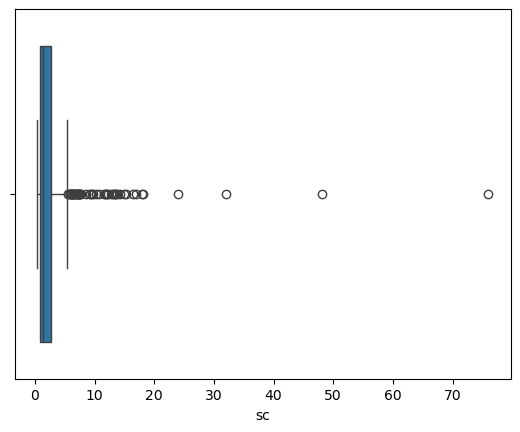

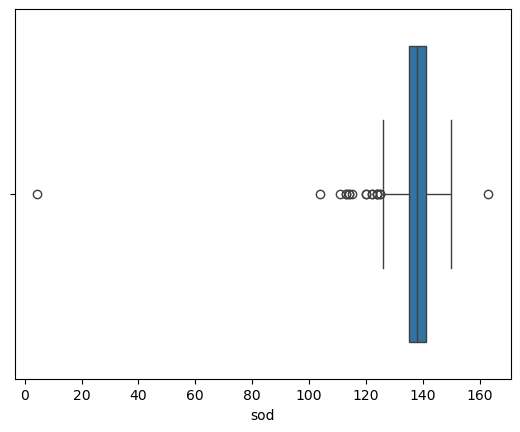

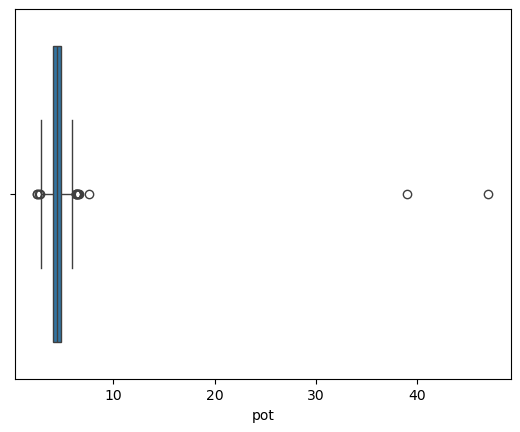

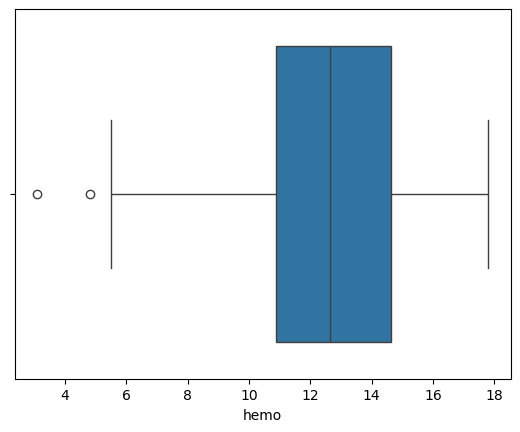

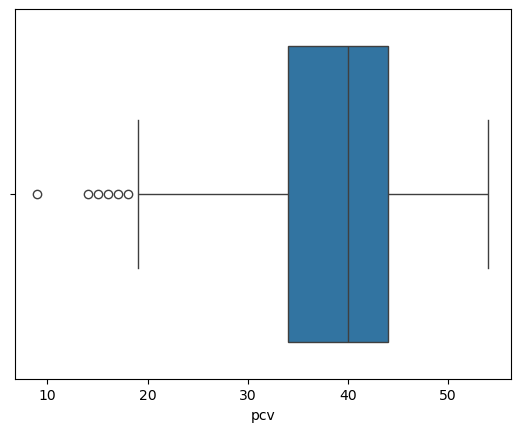

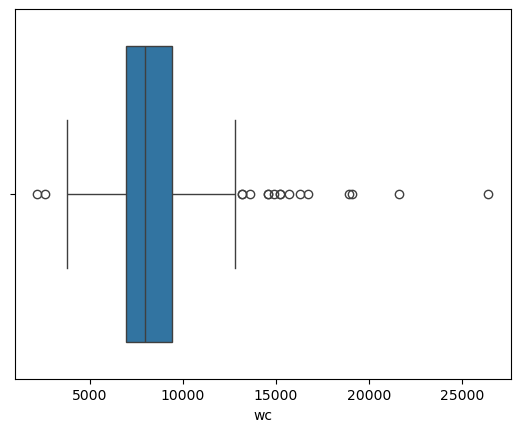

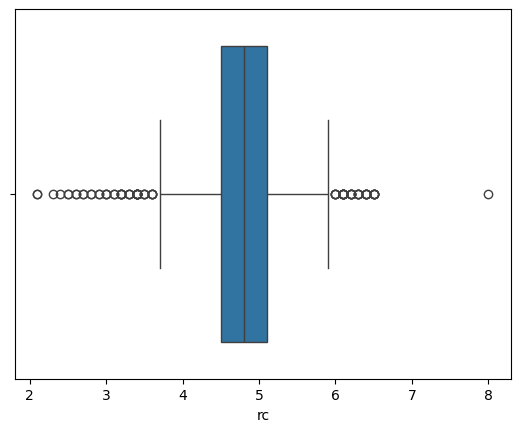

In [241]:
# Check for outliers for numeruical columns

def boxplot(col):
    sns.boxplot(x = num_df1[col])
    plt.show()

for col in num_df1.columns:
    boxplot(col)

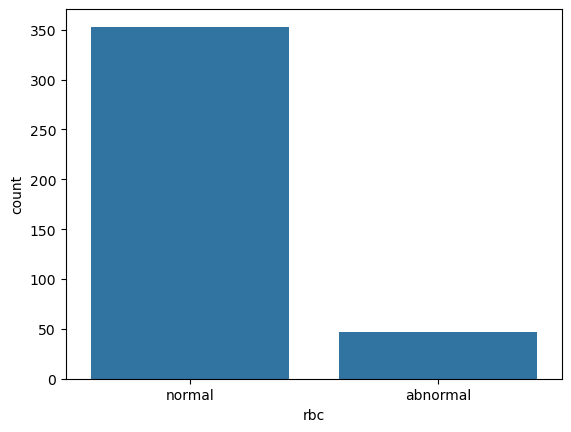

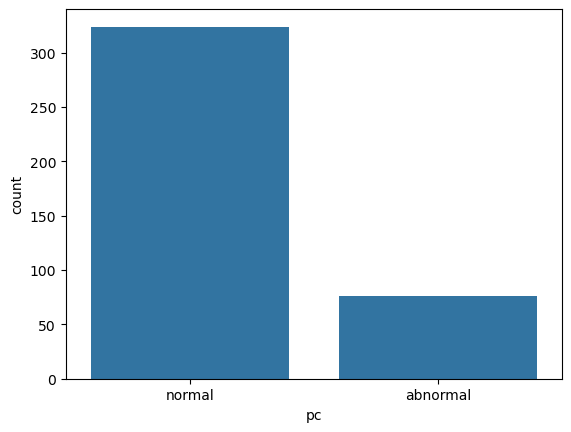

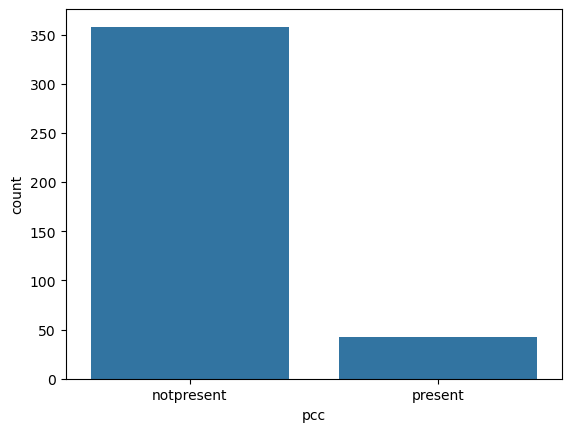

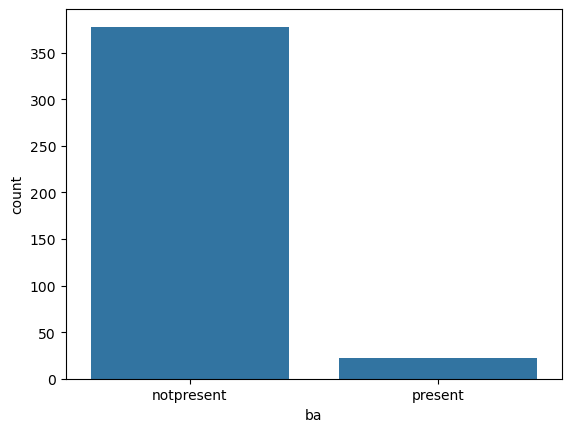

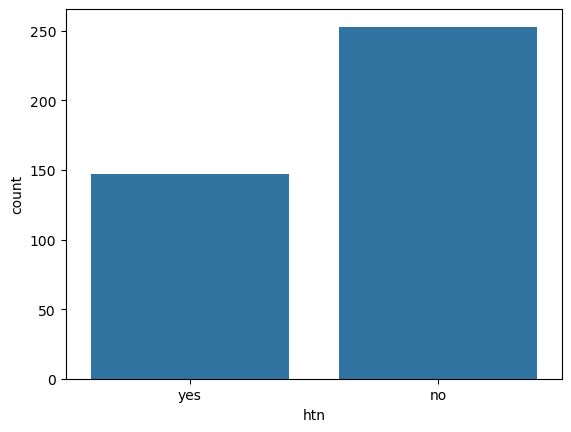

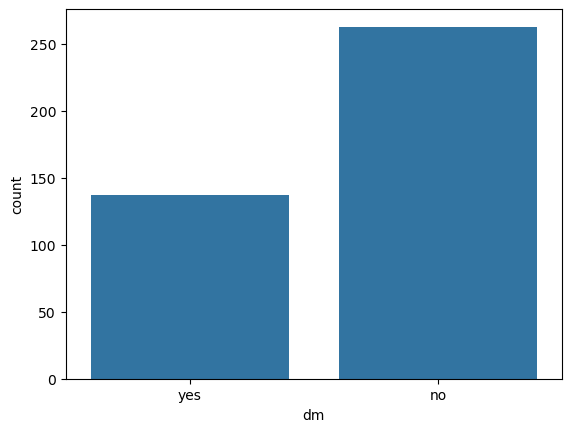

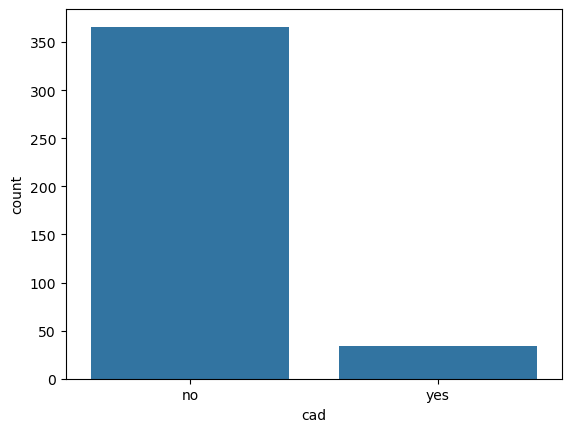

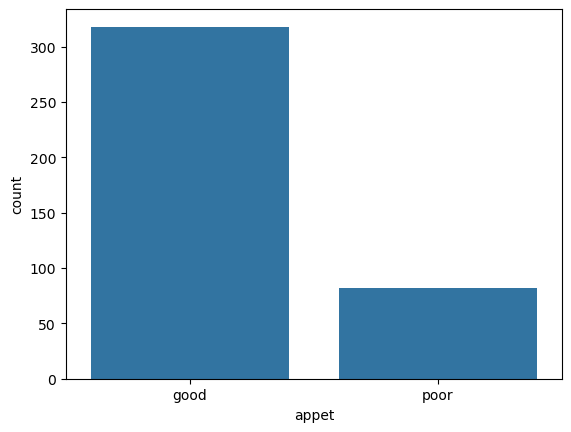

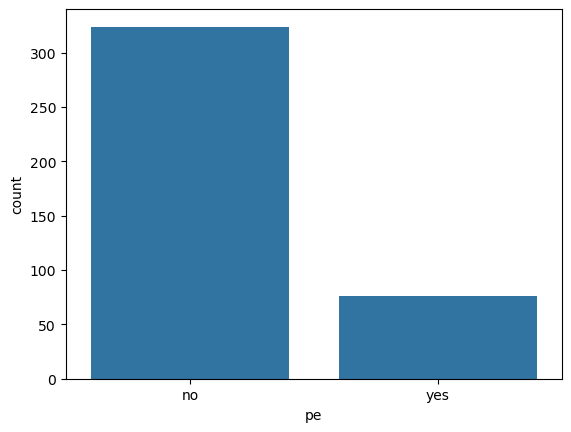

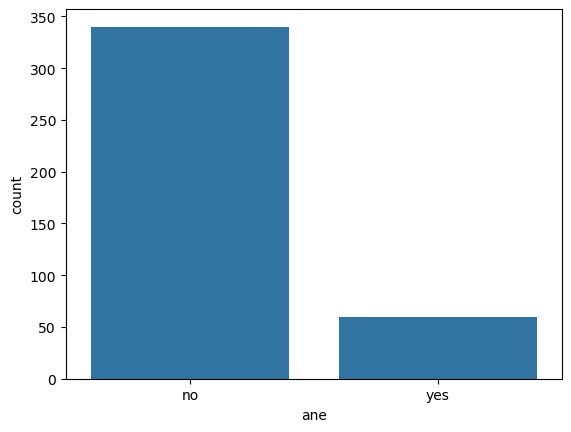

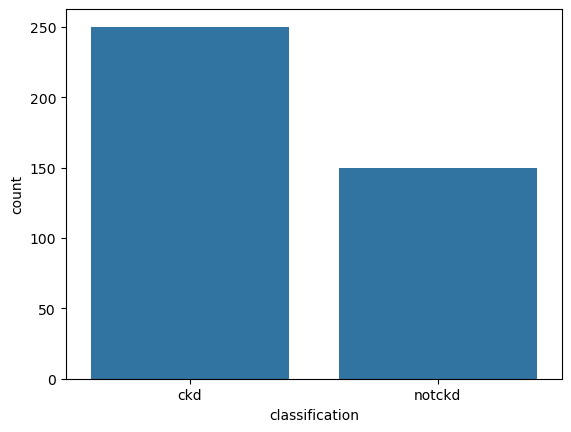

In [242]:
# Check for imbalance for categorical columns

def countplt(col):
    sns.countplot(x = cat_df1[col])
    plt.show()

for col in cat_df1.columns:
    countplt(col)

In [243]:
#concat processed data 

df = pd.concat([cat_df1,num_df1], axis=1)

#sample data after concat
df.head()

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,classification,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
0,normal,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd,0.0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,138.0,4.4,15.4,44.0,7800.0,5.2
1,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd,1.0,7.0,50.0,1.020,4.0,0.0,121.0,18.0,0.8,138.0,4.4,11.3,38.0,6000.0,4.8
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,ckd,2.0,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,138.0,4.4,9.6,31.0,7500.0,4.8
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,ckd,3.0,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd,4.0,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,138.0,4.4,11.6,35.0,7300.0,4.6


In [244]:
#check duplicate values
df[df.duplicated()].shape[0]

0

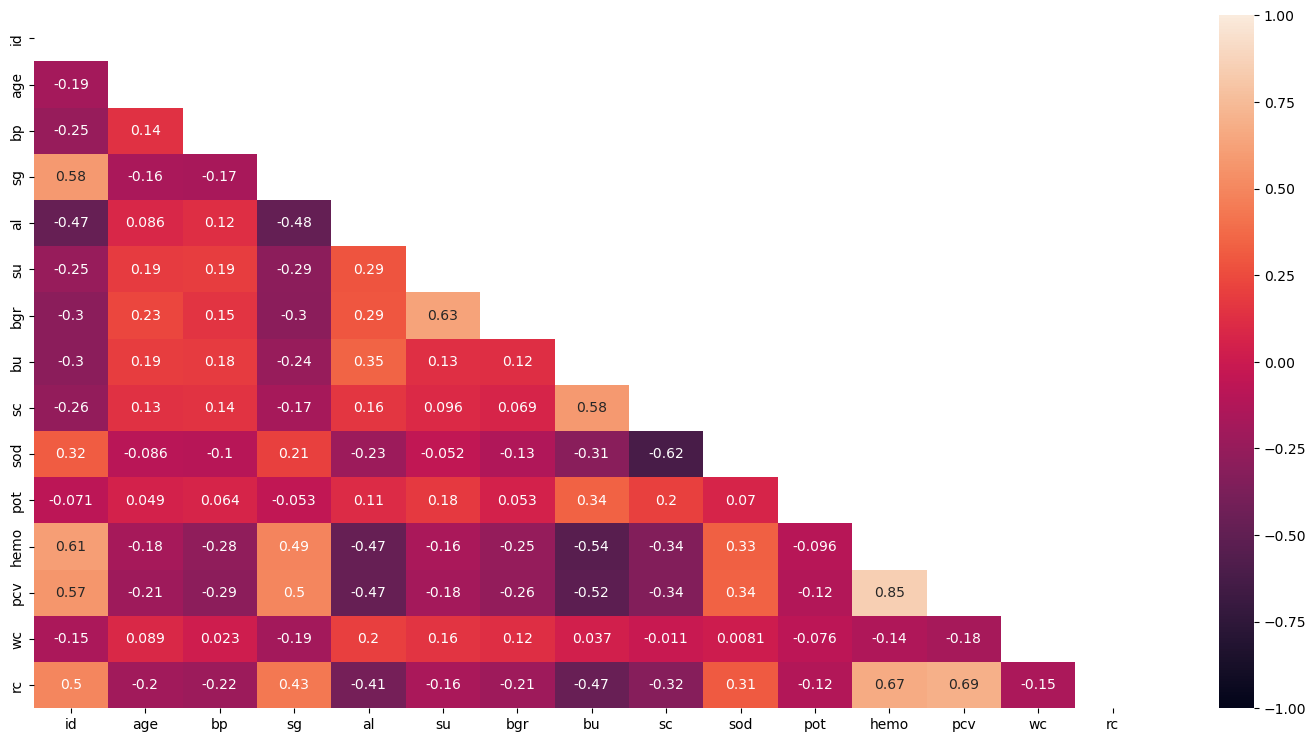

In [245]:
#heat map for bivariant analysis
plt.figure(figsize=(18,9))
sns.heatmap(df.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, mask=np.triu(df.corr(numeric_only=True)))
plt.show()

In [246]:
# understand categorical data
for col in df.select_dtypes(include='O').columns:
    print(col," : ",df[col].nunique())

rbc  :  2
pc  :  2
pcc  :  2
ba  :  2
htn  :  2
dm  :  2
cad  :  2
appet  :  2
pe  :  2
ane  :  2
classification  :  2


each categories have only 2 unique values so it doesn't matter if we use OneHot or Label encoding

In [248]:
#encode categorical data using label encoding

l_encoder = LabelEncoder()
for col in df.select_dtypes(include='O').columns:
    df[col] = l_encoder.fit_transform(df[col])


#sample data after encoding
df.head()

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,classification,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
0,1,1,0,0,1,1,0,0,0,0,0,0.0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,138.0,4.4,15.4,44.0,7800.0,5.2
1,1,1,0,0,0,0,0,0,0,0,0,1.0,7.0,50.0,1.020,4.0,0.0,121.0,18.0,0.8,138.0,4.4,11.3,38.0,6000.0,4.8
2,1,1,0,0,0,1,0,1,0,1,0,2.0,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,138.0,4.4,9.6,31.0,7500.0,4.8
3,1,0,1,0,1,0,0,1,1,1,0,3.0,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9
4,1,1,0,0,0,0,0,0,0,0,0,4.0,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,138.0,4.4,11.6,35.0,7300.0,4.6


In [249]:
# split data into independent and dependent variable

x = df.drop(['classification','id'], axis=1)
y = df['classification']

#details about dependent variable
y.describe()

count    400.000000
mean       0.375000
std        0.484729
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: classification, dtype: float64

In [250]:
y.value_counts()

classification
0    250
1    150
Name: count, dtype: int64

In [251]:
# train test split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify= y)

#data dimension after split
print('x_train:',x_train.shape)
print('y_train:',y_train.shape)
print('x_test:',x_test.shape)
print('y_test:',y_test.shape)

x_train: (320, 24)
y_train: (320,)
x_test: (80, 24)
y_test: (80,)


In [252]:
# apply standerdisation

scaler = StandardScaler()
# x_train_scaled = scaler.fit_transform(x_train)
# x_test_scaled = scaler.transform(x_test)
x_train_scaled = x_train
x_test_scaled = x_test
# train after scaling
x_train_scaled

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
380,1,1,0,0,0,0,0,0,0,0,59.0,60.0,1.020,0.0,0.0,113.0,23.0,1.1,139.0,3.5,15.30,54.0,6500.0,4.9
56,1,0,1,0,1,1,1,1,1,0,76.0,70.0,1.015,3.0,4.0,121.0,164.0,9.7,131.0,4.4,10.20,30.0,11300.0,3.4
126,1,1,0,0,1,1,0,1,1,0,70.0,90.0,1.015,0.0,0.0,144.0,125.0,4.0,136.0,4.6,12.00,37.0,8200.0,4.5
371,1,1,0,0,0,0,0,0,0,0,28.0,60.0,1.025,0.0,0.0,79.0,50.0,0.5,145.0,5.0,17.60,51.0,6500.0,5.0
333,1,1,0,0,0,0,0,0,0,0,23.0,80.0,1.020,0.0,0.0,99.0,46.0,1.2,142.0,4.0,17.70,46.0,4300.0,5.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,0,0,0,0,1,1,0,1,1,1,56.0,90.0,1.005,4.0,3.0,242.0,132.0,16.4,140.0,4.2,8.40,26.0,8000.0,3.0
274,1,1,0,0,0,0,0,0,0,0,19.0,80.0,1.020,0.0,0.0,107.0,23.0,0.7,141.0,4.2,14.40,44.0,8000.0,4.8
192,1,1,0,0,0,0,0,0,0,0,46.0,110.0,1.015,0.0,0.0,130.0,16.0,0.9,138.0,4.4,12.65,40.0,8000.0,4.8
85,1,1,0,0,0,1,0,1,1,0,70.0,70.0,1.015,2.0,0.0,121.0,46.0,1.5,138.0,4.4,9.90,40.0,8000.0,4.8


# Traditional Model Build

In [254]:
#import claasification models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
# from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

#import evalution metrics
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [255]:
#implement models

#LogisticRegression
log_model = LogisticRegression()
log_model = log_model.fit(x_train_scaled,y_train)
y_pred_log = log_model.predict(x_test_scaled)
accuracy_log = accuracy_score(y_test, y_pred_log)

#DecisionTreeClassifier
DT_model = DecisionTreeClassifier()
DT_model = DT_model.fit(x_train_scaled, y_train)
y_pred_DT = DT_model.predict(x_test_scaled)
accuracy_DT = accuracy_score(y_test, y_pred_DT)

#RandomForestClassifier
RF_model = RandomForestClassifier()
RF_model = RF_model.fit(x_train_scaled,y_train)
y_pred_RF = RF_model.predict(x_test_scaled)
accuracy_RF = accuracy_score(y_test, y_pred_RF)

#KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model = knn_model.fit(x_train_scaled,y_train)
y_pred_knn = knn_model.predict(x_test_scaled)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

#SVC
svc_model = SVC()
svc_model = svc_model.fit(x_train_scaled,y_train)
y_pred_svc = svc_model.predict(x_test_scaled)
accuracy_svc = accuracy_score(y_test, y_pred_svc)

#GaussianNB
g_model = GaussianNB()
g_model = g_model.fit(x_train_scaled,y_train)
y_pred_g = g_model.predict(x_test_scaled)
accuracy_g = accuracy_score(y_test, y_pred_g)


#Voting VotingClassifier -> combine all above models
voting_model = VotingClassifier(estimators=[('log',log_model),('dt',DT_model),('rf',RF_model),('knn',knn_model),('svc',svc_model),('g',g_model)])
voting_model = voting_model.fit(x_train_scaled, y_train)
y_pred_voting = voting_model.predict(x_test_scaled)
accuracy_voting = accuracy_score(y_test, y_pred_voting)

models = ['LogisticR', 'DT', 'RandomF', 'KNN', 'SVC', 'Gaussian','voting']
accuracies = [accuracy_log, accuracy_DT, accuracy_RF, accuracy_knn, accuracy_svc, accuracy_g, accuracy_voting] 

df_accuracy = pd.DataFrame({'Methods':models, 'Accuracies': accuracies})

print(df_accuracy)


     Methods  Accuracies
0  LogisticR      0.8750
1         DT      0.9625
2    RandomF      0.9750
3        KNN      0.6125
4        SVC      0.6250
5   Gaussian      0.9750
6     voting      0.9375


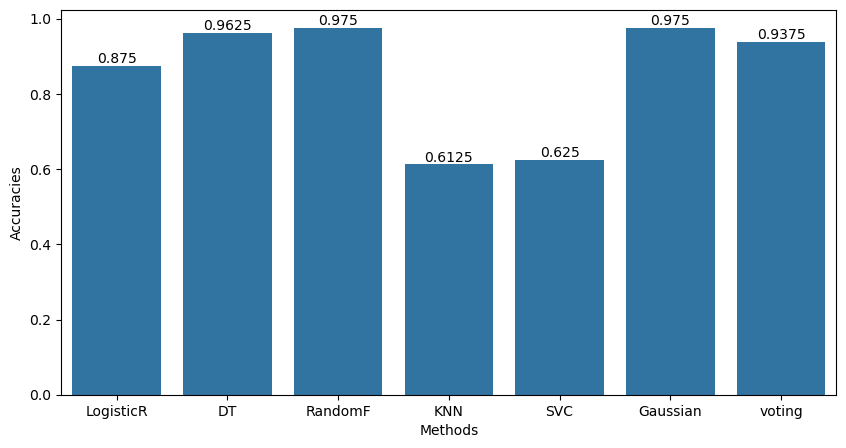

In [256]:
#plot bar chart
plt.figure(figsize=(10,5))
ax = sns.barplot(data=df_accuracy, x='Methods', y='Accuracies')
ax.bar_label(ax.containers[0])
plt.show()

Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95        50
           1       1.00      0.83      0.91        30

    accuracy                           0.94        80
   macro avg       0.95      0.92      0.93        80
weighted avg       0.94      0.94      0.94        80



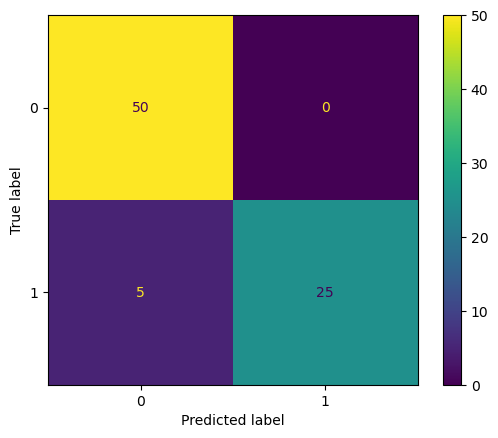

In [257]:
print('Classification Report:\n',classification_report(y_test,y_pred_voting))
confusion_matrix(y_test,y_pred_voting)
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_voting)

In [258]:
#Find area under the curve
auc_score = roc_auc_score(y_test,y_pred_voting)
print('Area under the curve:',round(auc_score*100,2),'%')

Area under the curve: 91.67 %


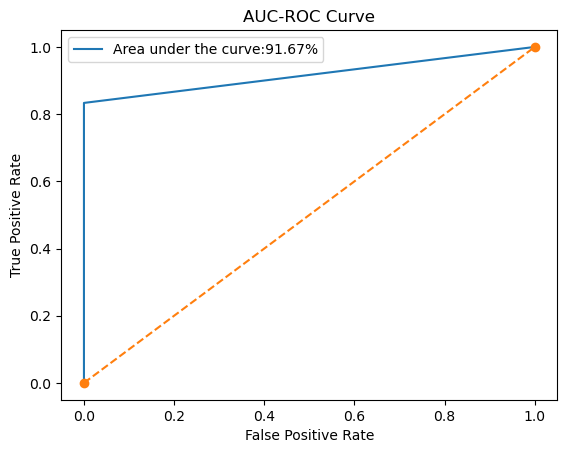

In [259]:
#plot area under the curve (tpr vs fpr)
fpr, tpr, thr = roc_curve(y_test,y_pred_voting)

plt.plot(fpr,tpr,label=f'Area under the curve:{round(auc_score*100,2)}%')
plt.plot([0,1],[0,1],linestyle='dashed', marker='o')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('AUC-ROC Curve')
plt.show()

## CrossValidationa
For bias variance tradeoff (based on accuarcies and confusion matrix we can say that model is highly overfitting)

In [261]:
from sklearn.model_selection import cross_val_score
training = cross_val_score(voting_model,x_train_scaled,y_train, cv=10)
print('CrossVal Accuracy:',training.mean())

CrossVal Accuracy: 0.9875


Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95        50
           1       1.00      0.83      0.91        30

    accuracy                           0.94        80
   macro avg       0.95      0.92      0.93        80
weighted avg       0.94      0.94      0.94        80



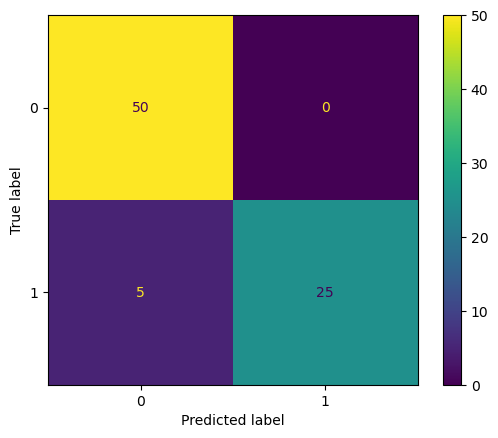

In [262]:
print('Classification Report:\n',classification_report(y_test,y_pred_voting))
confusion_matrix(y_test,y_pred_voting)
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_voting)